# Introducción a la Probabilidad y la Estadística
En este cuaderno, exploraremos algunos de los conceptos que hemos discutido previamente. Muchos conceptos de probabilidad y estadística están bien representados en las principales bibliotecas de procesamiento de datos en Python, como `numpy` y `pandas`.

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variables Aleatorias y Distribuciones
Comencemos extrayendo una muestra de 30 valores de una distribución uniforme entre 0 y 9. También calcularemos la media y la varianza..

In [4]:
# 1️⃣ Generar una muestra de 30 valores de una distribución uniforme entre 0 y 9
muestra = np.random.uniform(0, 9, 30)

In [5]:
# 2️⃣ Calcular la media (promedio)
media = np.mean(muestra)

In [6]:
# 3️⃣ Calcular la varianza
varianza = np.var(muestra)

In [7]:
# 4️⃣ Mostrar los resultados
print("Muestra:", muestra)
print("Media:", media)
print("Varianza:", varianza)

Muestra: [6.85255734 6.03608718 0.30542178 4.74738306 6.74571392 6.50671387
 0.89366022 6.71588918 6.9470421  7.20812114 7.5519505  7.24271329
 4.68034832 3.11133103 2.96940564 8.06253999 1.81029161 0.85163072
 3.79742419 1.92564848 2.12692306 8.42564383 6.86483948 0.0929953
 3.85736828 1.1654466  6.90223252 2.98034341 5.35372774 8.27477166]
Media: 4.700205513982636
Varianza: 6.893328335355606


Para estimar visualmente cuántos valores diferentes hay en la muestra, podemos graficar el : **histograma**:

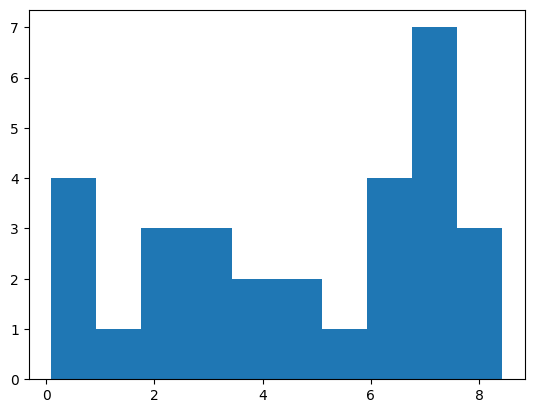

In [8]:
plt.hist(muestra)
plt.show()

## Analizando Datos Reales

La media y la varianza son muy importantes al analizar datos del mundo real. Carguemos los datos sobre jugadores de béisbol desde [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)

In [12]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Nombre','Equipo','Rol','Peso','Altura','Edad'])
df.head()


,Nombre,Equipo,Rol,Peso,Altura,Edad
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [13]:
df.tail()

,Nombre,Equipo,Rol,Peso,Altura,Edad
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


> Estamos utilizando un paquete llamado [**Pandas**](https://pandas.pydata.org/) aquí para el análisis de datos. Hablaremos más sobre Pandas y el trabajo con datos en Python más adelante en este curso.

Calculemos los valores promedio de edad, altura y peso:

In [14]:
df[['Edad','Altura','Peso']].mean()

Edad       28.736712
Altura    201.689255
Peso       73.697292
dtype: float64

Ahora concentrémonos en la altura y calculemos la desviación estándar y la varianza:

In [15]:
print(list(df['Altura'])[:20])

[180.0, 215.0, 210.0, 210.0, 188.0, 176.0, 209.0, 200.0, 231.0, 180.0, 188.0, 180.0, 185.0, 160.0, 180.0, 185.0, 197.0, 189.0, 185.0, 219.0]


In [17]:
media = df['Altura'].mean()
var = df['Altura'].var()
std = df['Altura'].std()
print(f"Media = {media}\nVarianza = {var}\nDesviacion Estandar = {std}")

Media = 201.6892545982575
Varianza = 440.64268481205494
Desviacion Estandar = 20.99149077154967


In [18]:
print(df['Altura'].min(), df['Altura'].max())


150.0 290.0


In [27]:
df

,Nombre,Equipo,Rol,Peso,Altura,Edad
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


Además de la media, tiene sentido observar el valor de la mediana y los cuartiles. Estos pueden visualizarse mediante un diagrama de caja **(box plot)**:

In [28]:
print(df.columns)

Index(['Nombre', 'Equipo', 'Rol', 'Peso', 'Altura', 'Edad'], dtype='object')


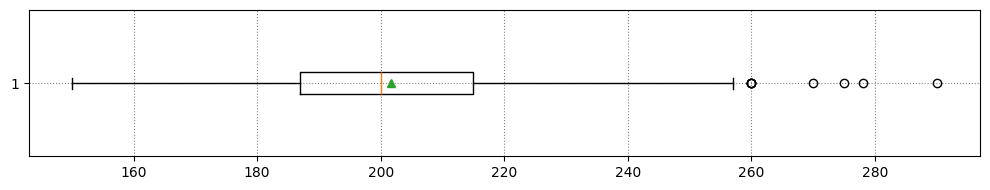

In [29]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Altura'].dropna(), vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

También podemos crear diagramas de caja de subconjuntos de nuestro conjunto de datos, por ejemplo, agrupados por el rol del jugador.

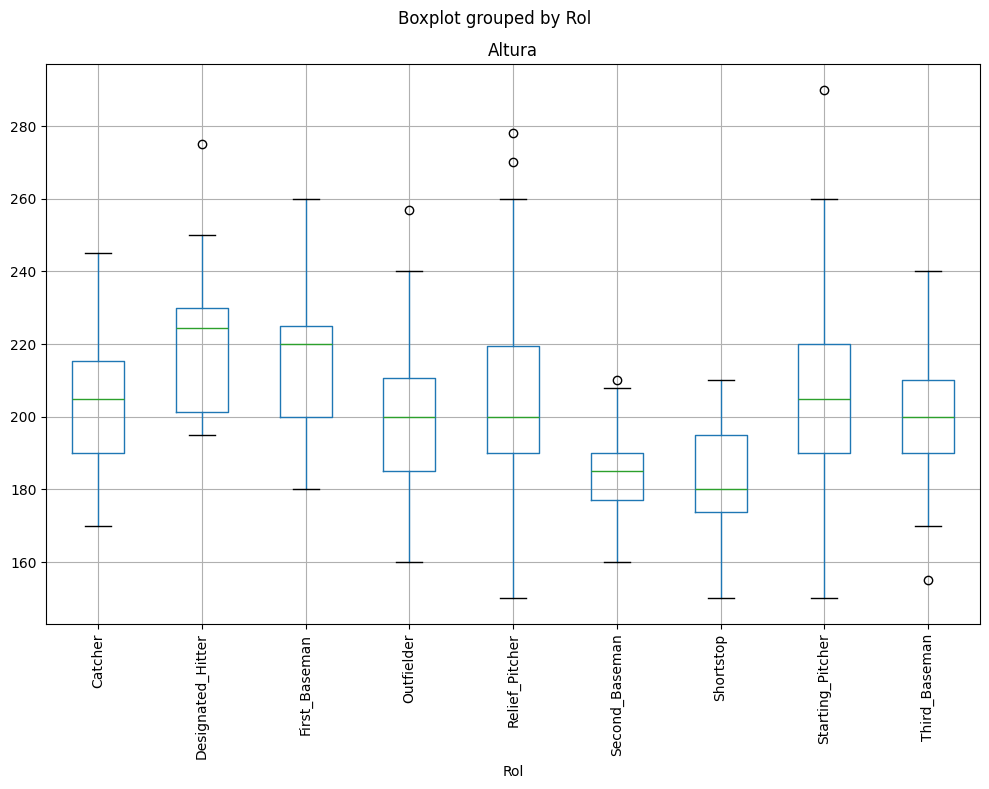

In [30]:
df.boxplot(column='Altura', by='Rol', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Nota**: Este diagrama sugiere que, en promedio, las alturas de los jugadores de primera base son mayores que las de los jugadores de segunda base. Más adelante aprenderemos cómo probar esta hipótesis de manera más formal y cómo demostrar que nuestros datos son estadísticamente significativos para sustentarla.  

La edad, la altura y el peso son todas variables aleatorias continuas. ¿Qué crees que caracteriza su distribución? Una buena forma de averiguarlo es graficar el histograma de sus valores:

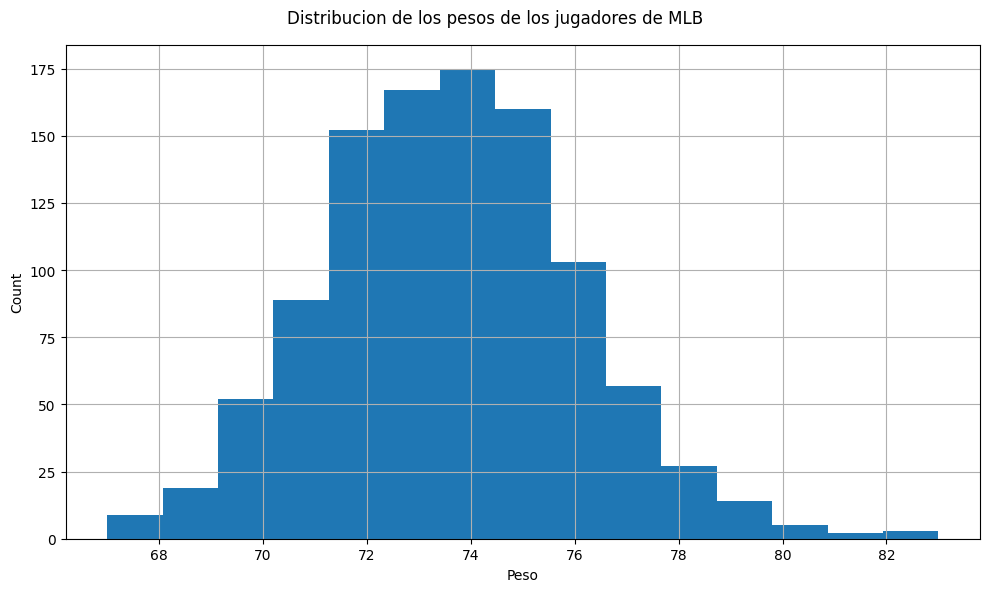

In [31]:
df['Peso'].hist(bins=15, figsize=(10,6))
plt.suptitle('Distribución de los pesos de los jugadores de MLB')
plt.xlabel('Peso')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribución Normal

Creemos una muestra artificial de pesos que siga una distribución normal con la misma media y varianza que nuestros datos reales:

In [32]:
generated = np.random.normal(media, std, 1000)
generated[:20]

array([204.25865447, 214.53004863, 228.2421064 , 224.72333435,
       226.94281571, 200.67721439, 216.36795961, 181.34216006,
       198.77718472, 238.2208167 , 182.80413655, 199.58101945,
       206.04929237, 205.62278068, 220.29199518, 162.32807719,
       234.9914483 , 219.42634333, 193.45816331, 211.56647225])

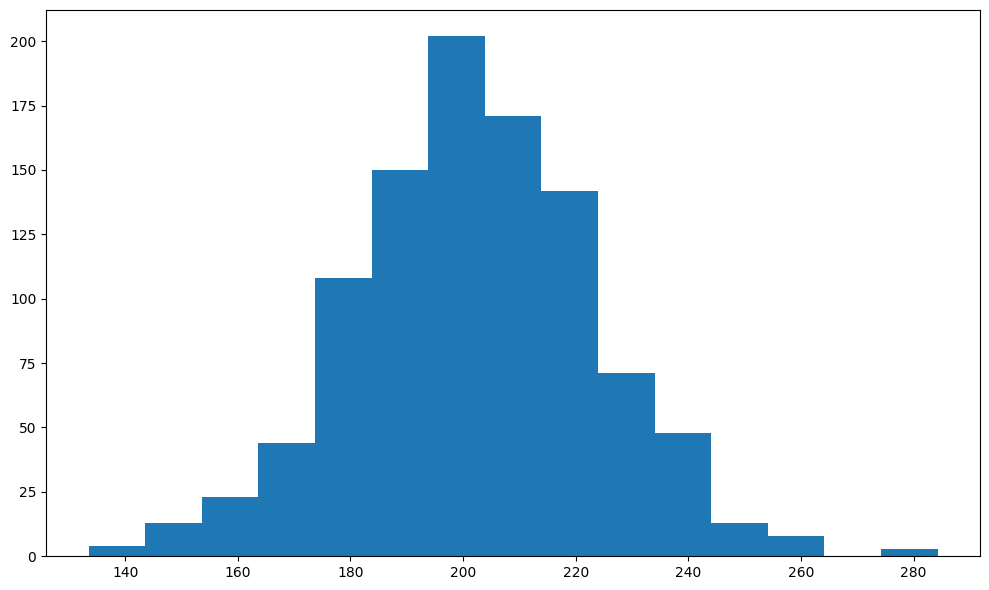

In [33]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

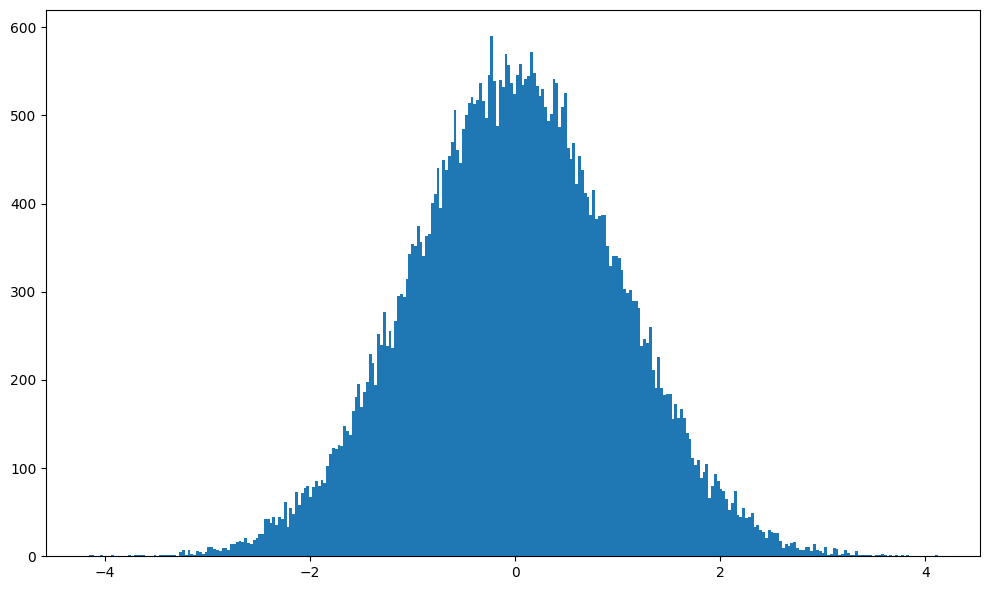

In [35]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Dado que la mayoría de los valores en la vida real se distribuyen normalmente, no deberíamos usar un generador de números aleatorios uniformes para crear datos de muestra.
Esto es lo que ocurre si intentamos generar pesos con una distribución uniforme (generada por `np.random.rand`):

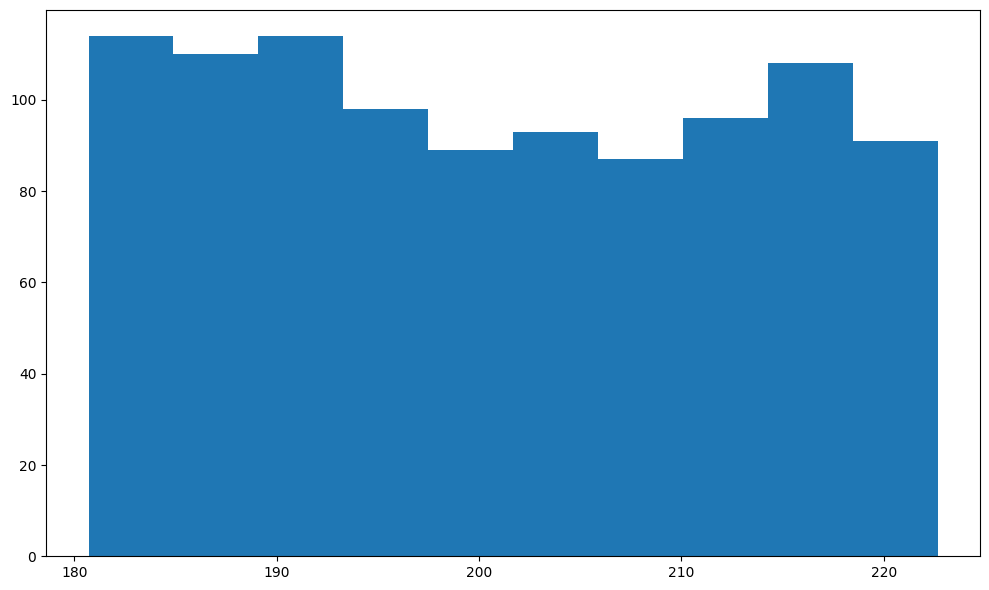

In [37]:
wrong_sample = np.random.rand(1000)*2*std+media-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervalos de Confianza

Ahora calculemos los intervalos de confianza para los pesos y las alturas de los jugadores de béisbol. Usaremos el siguiente código: [from this stackoverflow discussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [40]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Peso'].ffill(),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Prueba de Hipotesis

Exploremos los diferentes roles en nuestro conjunto de datos de jugadores de béisbol:

In [41]:
df.groupby('Rol').agg({ 'Peso' : 'mean', 'Altura' : 'mean', 'Edad' : 'count'}).rename(columns={ 'Edad' : 'Count'})

,Peso,Altura,Count
Rol,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


Probemos la hipótesis de que los jugadores de primera base son más altos que los jugadores de segunda base. La forma más sencilla de hacerlo es comparar los intervalos de confianza:

In [42]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Rol']=='First_Baseman',['Altura']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Rol']=='Second_Baseman',['Peso']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 71.04..71.69
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 70.99..71.73
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 70.92..71.81


Podemos ver que los intervalos no se superponen.
Una forma estadísticamente más correcta de comprobar la hipótesis es utilizar una **Student t-test**:

In [44]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Rol']=='First_Baseman',['Altura']], df.loc[df['Rol']=='Second_Baseman',['Altura']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Los dos valores que devuelve la función `ttest_ind` son:
* p-value puede considerarse como la probabilidad de que dos distribuciones tengan la misma media. En nuestro caso, este valor es muy bajo, lo que significa que hay una fuerte evidencia que respalda que los jugadores de primera base son más altos.
* es el valor intermedio de la diferencia de medias normalizada que se utiliza en la prueba t, y se compara con un valor umbral correspondiente a un determinado nivel de confianza.

## Simulando una distribución normal con el Teorema del Límite Central

El generador seudorrandom en Python está diseñado para proporcionarnos una distribución uniforme. Si queremos crear un generador para una distribución normal, podemos utilizar el Teorema del Límite Central.
Para obtener un valor distribuido normalmente, simplemente calcularemos la media de una muestra generada de forma uniforme.

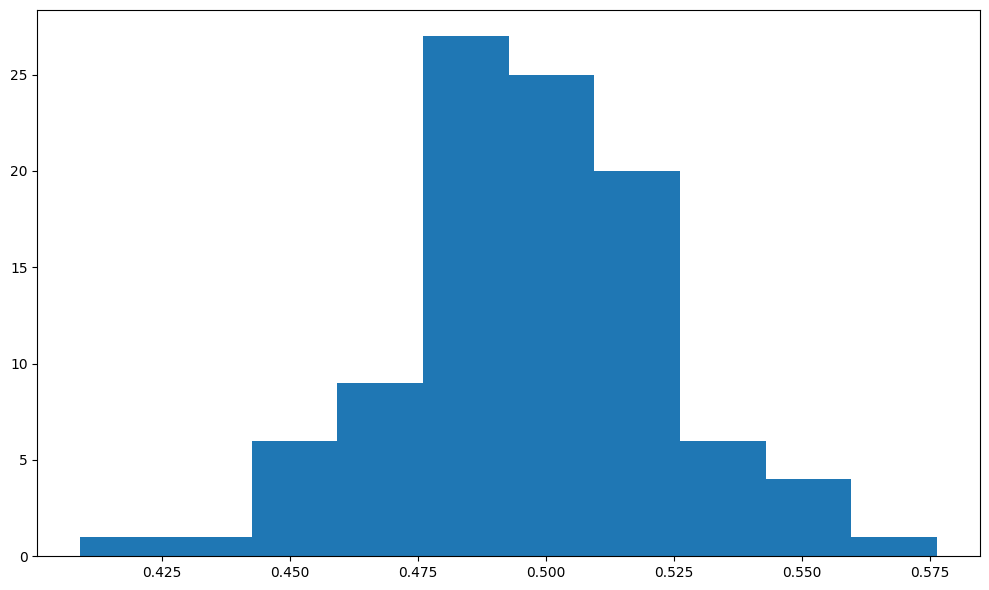

In [45]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlación y la Corporación Malvada de Béisbol

La correlación nos permite encontrar relaciones entre secuencias de datos. En nuestro ejemplo didáctico, imaginemos que existe una corporación de béisbol “malvada” que paga a sus jugadores según su altura: cuanto más alto es el jugador, más dinero gana. Supongamos que existe un salario base de $1000 

y un bono adicional de entre 
$0 
y 

$100, dependiendo de la altura. Tomaremos a los jugadores reales de la **MLB** y calcularemos sus 

**salarios imaginarios**:


In [54]:
heights = df['Altura']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180.0, 1033.9709509454644), (215.0, 1073.6037270485065), (210.0, 1067.941901890929), (210.0, 1067.941901890929), (188.0, 1043.0298711975884), (176.0, 1029.4414908194026), (209.0, 1066.8095368594136), (200.0, 1056.6182515757741), (231.0, 1091.721567552754), (180.0, 1033.9709509454644)]


In [55]:
print(heights)

0       180.0
1       215.0
2       210.0
3       210.0
4       188.0
        ...  
1029    190.0
1030    180.0
1031    205.0
1032    190.0
1033    195.0
Name: Altura, Length: 1034, dtype: float64


In [56]:
print(salaries)

0       1033.970951
1       1073.603727
2       1067.941902
3       1067.941902
4       1043.029871
           ...     
1029    1045.294601
1030    1033.970951
1031    1062.280077
1032    1045.294601
1033    1050.956426
Name: Altura, Length: 1034, dtype: float64


In [57]:
heights = np.array(heights, dtype=float)

In [58]:
salaries = np.array(salaries, dtype=float)

In [59]:
# Elimina valores NaN si los hay
mask = ~np.isnan(heights) & ~np.isnan(salaries)
heights = heights[mask]
salaries = salaries[mask]

In [60]:
print(len(heights), len(salaries))


1033 1033


In [61]:
if len(heights) == len(salaries):
    print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
else:
    print("Error: las secuencias tienen longitudes diferentes.")

Covariance matrix:
[[440.64268481 498.96836767]
 [498.96836767 565.01433139]]


In [62]:
print(f"Covariance matrix:\n{np.cov([heights, salaries])}")

Covariance matrix:
[[440.64268481 498.96836767]
 [498.96836767 565.01433139]]


Calculemos ahora la **covarianza** y la **correlación** de esas secuencias.  

`np.cov` nos devolverá la llamada **matriz de covarianza**, que es una extensión de la covarianza a múltiples variables.  

El elemento $M_{ij}$ de la matriz de covarianza $M$ representa la **correlación entre las variables de entrada** $X_i$ y $X_j$, mientras que los valores diagonales $M_{ii}$ corresponden a la **varianza de** $X_i$.  

De manera similar, `np.corrcoef` nos proporcionará la **matriz de correlación**.


In [63]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")

Covariance matrix:
[[440.64268481 498.96836767]
 [498.96836767 565.01433139]]


In [64]:
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")


Covariance = 498.9683676742695


In [65]:
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9999999999999994


Una correlación igual a 1 significa que existe una **relación lineal fuerte** entre dos variables.  
Podemos visualizar esta relación lineal graficando un valor frente al otro:

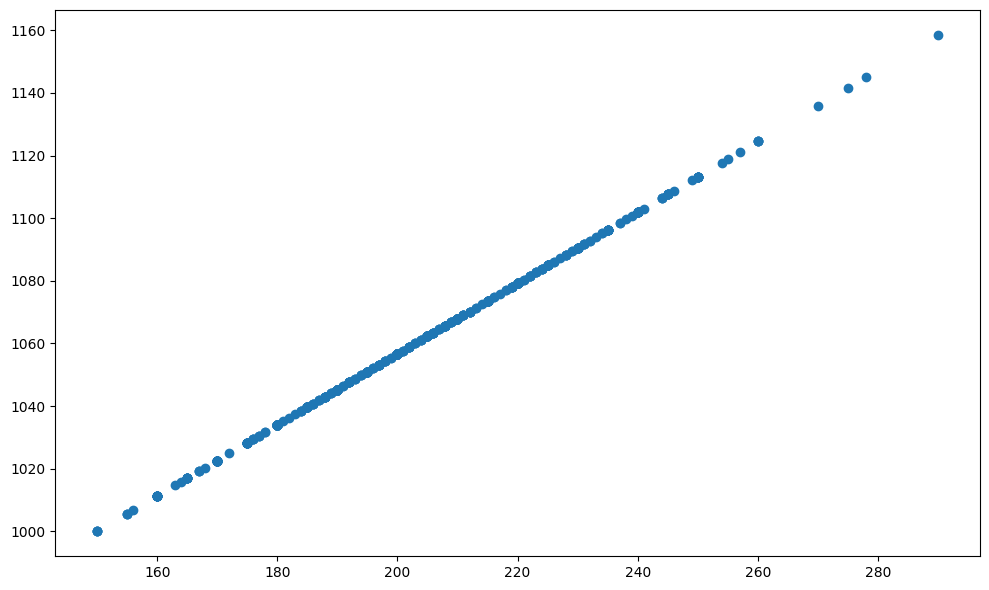

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Veamos qué ocurre si la relación no es lineal.  
Supongamos que nuestra corporación decidió ocultar la evidente dependencia lineal entre la altura y los salarios, e introdujo cierta **no linealidad** en la fórmula, por ejemplo, mediante una función `sin`:


In [67]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910674298089875


En este caso, la correlación es ligeramente menor, pero sigue siendo bastante alta.  
Ahora, para hacer que la relación sea aún menos evidente, podríamos añadir algo de **aleatoriedad adicional** incorporando una variable aleatoria al salario.  
Veamos qué sucede:

In [68]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9487160057082198


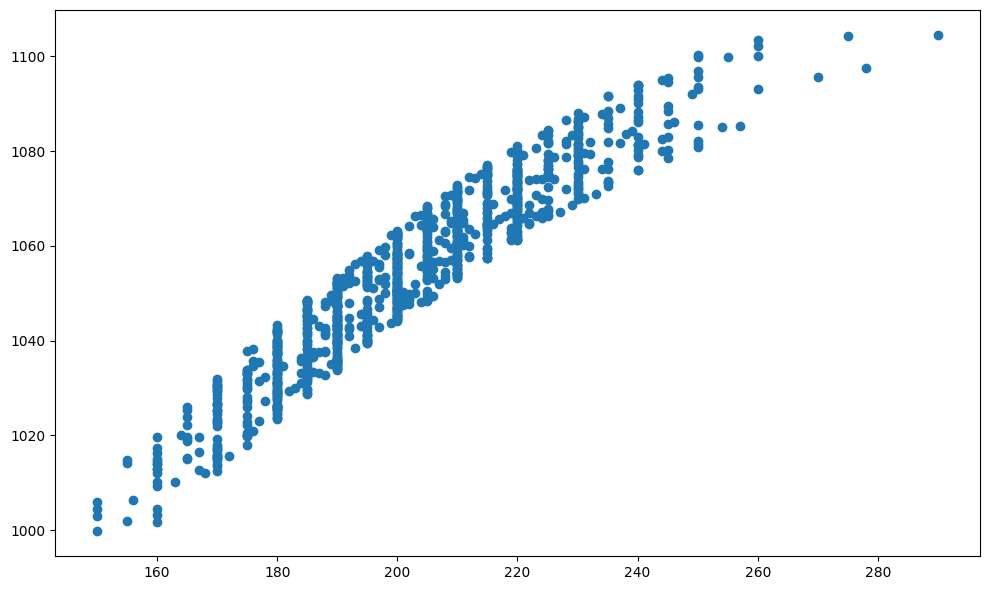

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> ¿Puedes adivinar por qué los puntos se alinean en líneas verticales de esta manera?

Hemos observado la correlación entre un concepto creado artificialmente, como el **salario**, y la variable observada *altura*.  
Veamos también si dos variables observadas, como la **altura** y el **peso**, están correlacionadas:


In [71]:
print(df['Altura'].isna().sum(), df['Peso'].isna().sum())
print(df[['Altura', 'Peso']].dtypes)

1 0
Altura    float64
Peso        int64
dtype: object


In [77]:
alturas = pd.to_numeric(df['Altura'], errors='coerce')
pesos = pd.to_numeric(df['Peso'], errors='coerce')

# Eliminar los valores nulos en ambas columnas
mask = ~np.isnan(alturas) & ~np.isnan(pesos)
alturas = alturas[mask]
pesos = pesos[mask]


In [78]:
# Calcular matriz de correlación
corr_matrix = np.corrcoef(alturas, pesos)
print("Matriz de correlación:\n", corr_matrix)

Matriz de correlación:
 [[1.         0.53188586]
 [0.53188586 1.        ]]


Desafortunadamente, no obtuvimos ningún resultado, solo algunos valores extraños `nan`.  
Esto se debe al hecho de que algunos de los valores en nuestras series están indefinidos, representados como `nan`, lo que hace que el resultado de la operación también sea indefinido.  

Al observar la matriz, podemos ver que la columna `Peso` es la problemática, ya que la autocorrelación entre los valores de `Altura` sí se ha calculado correctamente.  

> Este ejemplo muestra la importancia de la **preparación** y la **limpieza de datos**.  
> Sin datos adecuados, no podemos calcular nada.

Usemos el método `fillna` para rellenar los valores faltantes y calcular la correlación:


In [83]:
corr = df[['Altura', 'Peso']].ffill().corr()
print(corr)


          Altura      Peso
Altura  1.000000  0.529592
Peso    0.529592  1.000000


En efecto, existe una correlación, aunque no tan fuerte como en nuestro ejemplo artificial.  
De hecho, si observamos el gráfico de dispersión de un valor frente al otro, la relación sería mucho menos evidente:


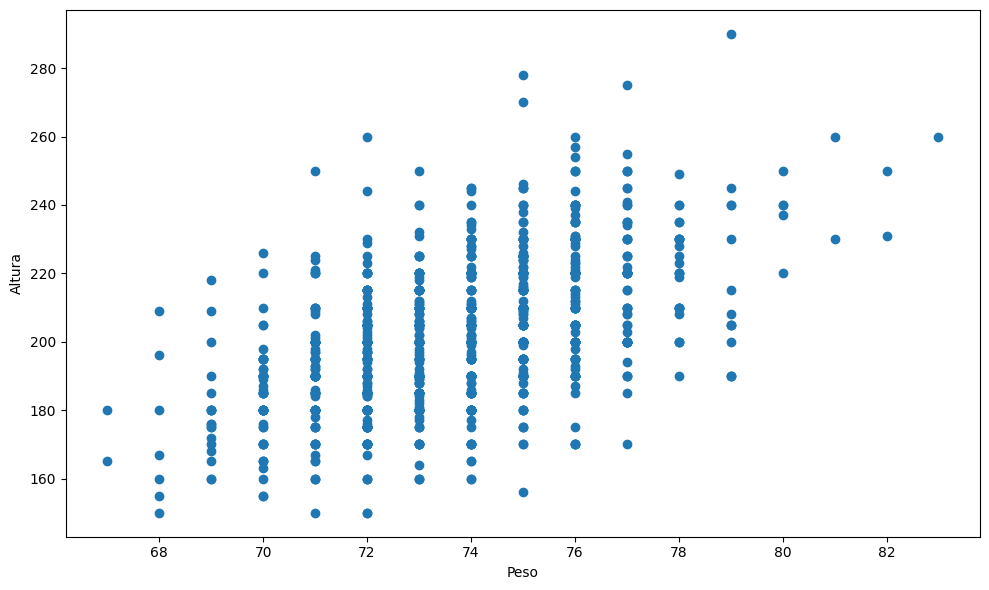

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(df['Peso'],df['Altura'])
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.tight_layout()
plt.show()

## Conclusión

En este cuaderno hemos aprendido cómo realizar operaciones básicas sobre los datos para calcular funciones estadísticas.  
Ahora sabemos cómo utilizar un conjunto sólido de herramientas matemáticas y estadísticas para **comprobar hipótesis**, y cómo **calcular intervalos de confianza** para variables arbitrarias a partir de una muestra de datos.
